<a href="https://colab.research.google.com/github/wahyuusuryaa/dataset-ukiran-bali/blob/main/train_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wahyuusuryaa/dataset-ukiran-bali.git

Cloning into 'dataset-ukiran-bali'...
remote: Enumerating objects: 1855, done.
remote: Counting objects: 100% (1855/1855), done.
remote: Compressing objects: 100% (1850/1850), done.
remote: Total 1855 (delta 24), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (1855/1855), 20.45 MiB | 32.32 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
import tensorflow as tf
import keras

print("Versi TensorFlow:", tf.__version__)
print("Versi Keras:", keras.__version__)

Versi TensorFlow: 2.15.0
Versi Keras: 2.15.0


In [2]:
# CONVERT IMAGE TO ARRAY #
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

img_size_224p = 224

path_train = '/content/dataset-ukiran-bali'
categories = ['kekarangan_boma', 'kekarangan_gajah', 'kekarangan_goak', 'kekarangan_tapel', 'keketusan_batu_batuan', 'keketusan_kakul_kakulan', 'patra_mesir', 'patra_pipid', 'patra_sari']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) ###
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])

    return imageData

dataTrain = create_data_img(path_train)

random.seed(10)
random.shuffle(dataTrain)

In [3]:
# GET Features(X) & GET Labels(Y)
X_train, y_train = [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)

X_train : (1800, 224, 224, 3)
y_train : (1800,)


In [4]:
# Features(X) Normalization
print("Isi Array X_train :\n\n", X_train[0])

def prep_pixels(dataset):
    train_norm = dataset.astype('float32')
    train_norm = train_norm / 255.0
    return train_norm

X_train_norm = prep_pixels(X_train)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])

Isi Array X_train :

 [[[ 66  35   7]
  [151 120  91]
  [164 131 100]
  ...
  [ 93  56  30]
  [100  62  39]
  [101  63  40]]

 [[ 70  36   9]
  [160 126  98]
  [173 140 107]
  ...
  [175 138 112]
  [185 147 124]
  [185 147 124]]

 [[ 74  39  11]
  [161 126  96]
  [178 143 111]
  ...
  [192 152 126]
  [193 153 128]
  [188 148 123]]

 ...

 [[177 140 113]
  [176 139 110]
  [174 137 110]
  ...
  [196 153 118]
  [185 142 107]
  [ 94  51  16]]

 [[175 144 116]
  [174 143 114]
  [173 142 114]
  ...
  [171 137 100]
  [167 133  96]
  [ 74  40   3]]

 [[ 92  62  34]
  [ 91  61  33]
  [ 89  62  33]
  ...
  [150 120  84]
  [156 126  90]
  [ 74  44   8]]]

Isi Array X_train_norm :

 [[[0.25882354 0.13725491 0.02745098]
  [0.5921569  0.47058824 0.35686275]
  [0.6431373  0.5137255  0.39215687]
  ...
  [0.3647059  0.21960784 0.11764706]
  [0.39215687 0.24313726 0.15294118]
  [0.39607844 0.24705882 0.15686275]]

 [[0.27450982 0.14117648 0.03529412]
  [0.627451   0.49411765 0.38431373]
  [0.6784314  0.

In [5]:
# Labels (Y) ENCODING
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)

# one hot encode target values
y_train_encode = to_categorical(y_train)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)

Isi Array y_train : [3 5 2 ... 4 0 5]

Isi Array y_train_encode :

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


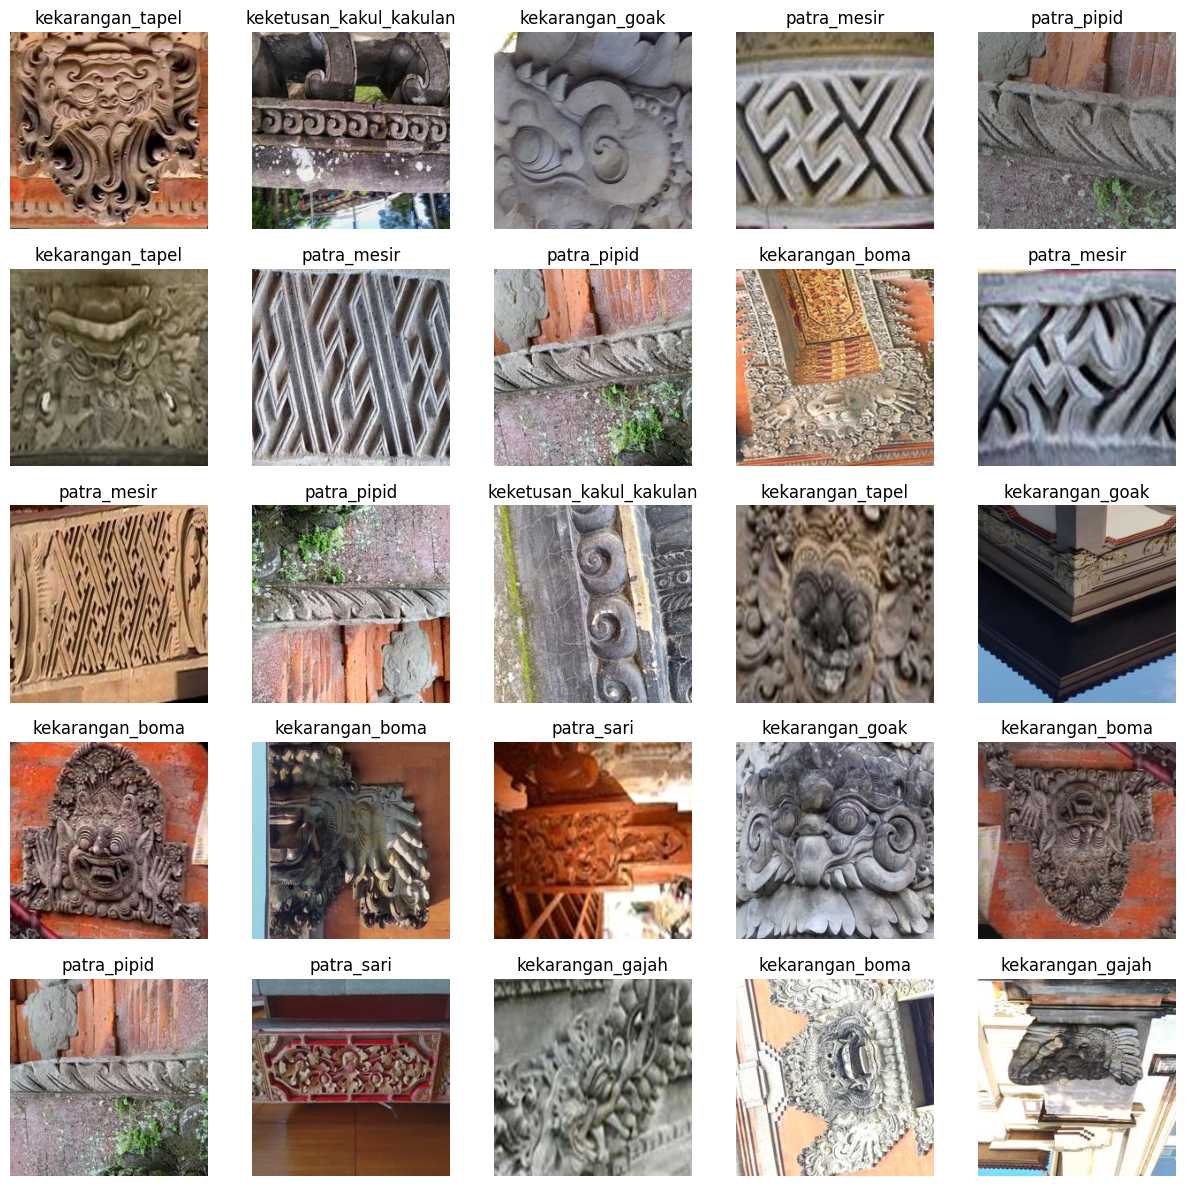

In [6]:
# PLOT/TAMPILKAN DATASET
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5
ncols = 5
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(13, 13))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j
        ax[i,j].imshow(X_train[temp])
        if y_train[temp] == 0:
            judul = "kekarangan_boma"
        elif y_train[temp] == 1:
            judul = "kekarangan_gajah"
        elif y_train[temp] == 2:
            judul = "kekarangan_goak"
        elif y_train[temp] == 3:
            judul = "kekarangan_tapel"
        elif y_train[temp] == 4:
            judul = "keketusan_batu_batuan"
        elif y_train[temp] == 5:
            judul = "keketusan_kakul_kakulan"
        elif y_train[temp] == 6:
            judul = "patra_mesir"
        elif y_train[temp] == 7:
            judul = "patra_pipid"
        elif y_train[temp] == 8:
            judul = "patra_sari"
        ax[i,j].set_title(judul)        # Show labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

In [65]:
# Data final yang akan digunakan
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)

X_train_norm     : (1800, 224, 224, 3)
y_train_encode   : (1800, 9)


In [8]:
os.mkdir("/content/save_model")

In [87]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
import pandas as pd
import gc
import tensorflow as tf
import numpy as np

def define_model_mobilenetv2():
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False
    base_model.summary()
    plot_model(base_model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    #model.add(Dropout(0.2, seed=10))
    #model.add(Dense(9, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(9, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(dataX, dataY, n_folds=5):
    epochs = 10
    batch_size = 64

    scores, histories = list(), list()
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=1)

    i = 0
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        model = define_model_mobilenetv2()
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        with tf.device('/GPU:0'):
            history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1)

        loss, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
        print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')

        scores.append(acc)
        histories.append(history)

        model.save("/content/save_model/model_fold_" + str(i) + ".h5")
        model_csv = pd.DataFrame(history.history)
        model_csv.to_csv("/content/save_model/model_fold_" + str(i) + ".csv", index=False)

        del trainX
        del trainY
        del valX
        del valY
        gc.collect()

    return scores, histories

scores, histories = evaluate_model(X_train_norm, y_train_encode)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_51 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_51[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

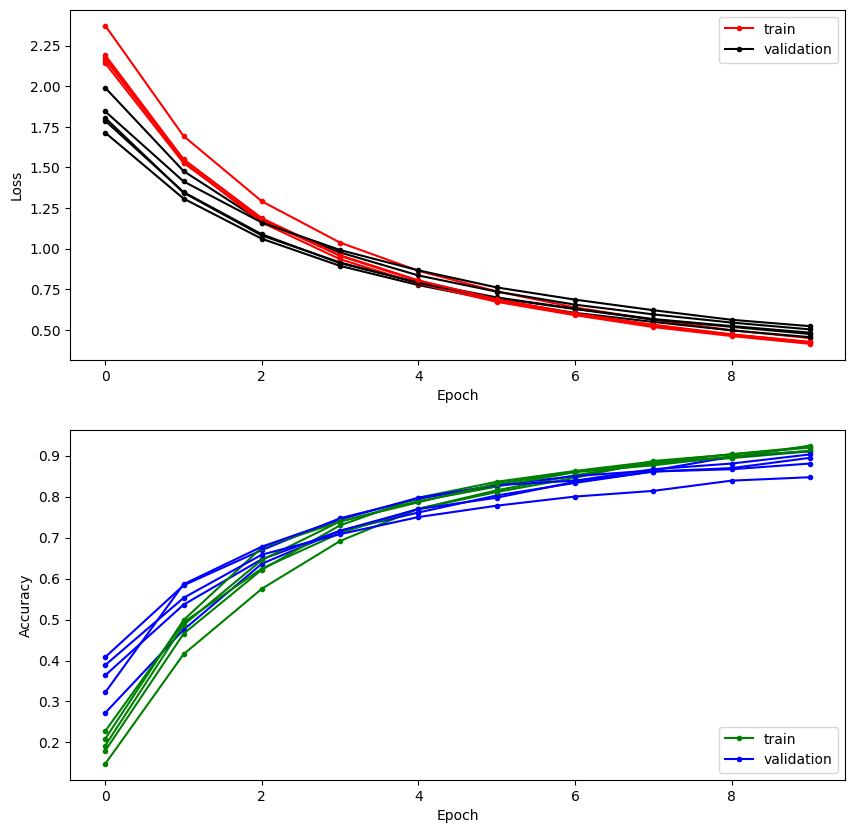

In [88]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories, save_path):
    plt.figure(figsize=(10,10))

    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='red', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(212)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')

    plt.savefig(save_path)
    plt.show()

save_path = '(TEST 10) plot 211.png'
summarize_diagnostics_combine(histories, save_path)

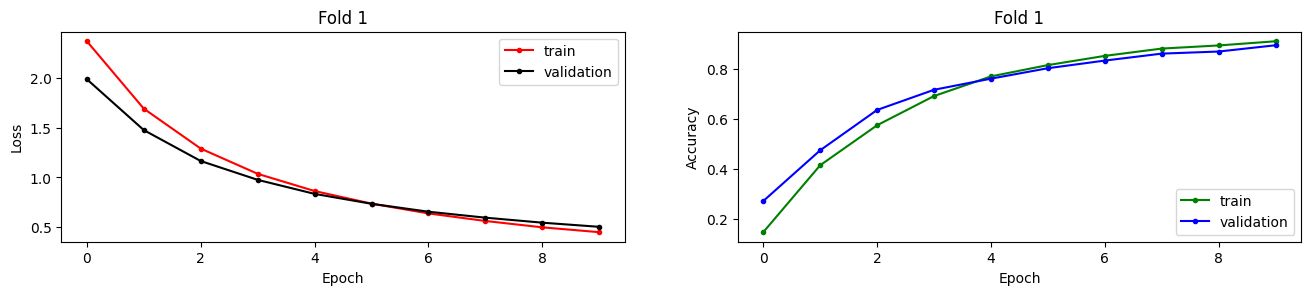

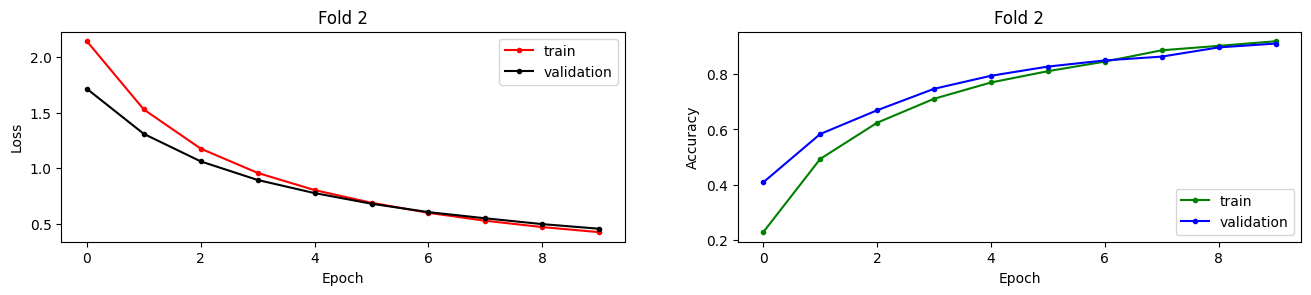

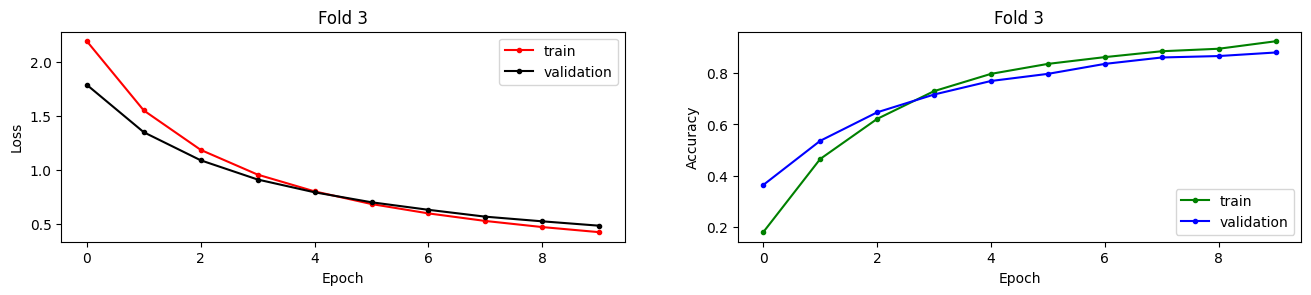

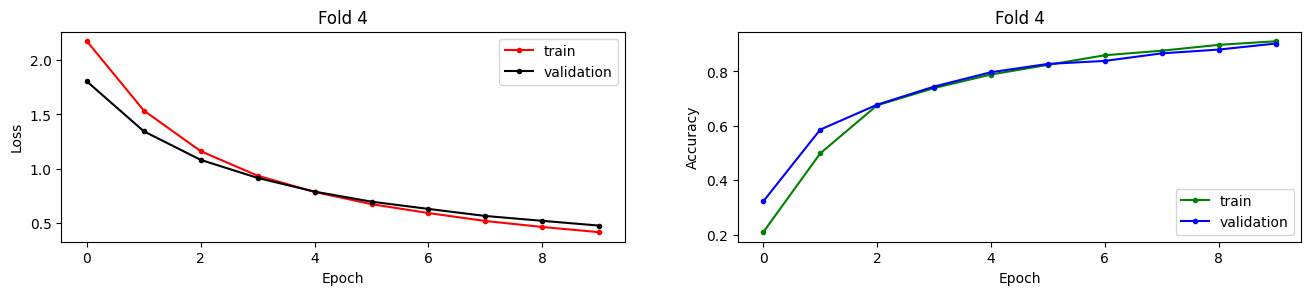

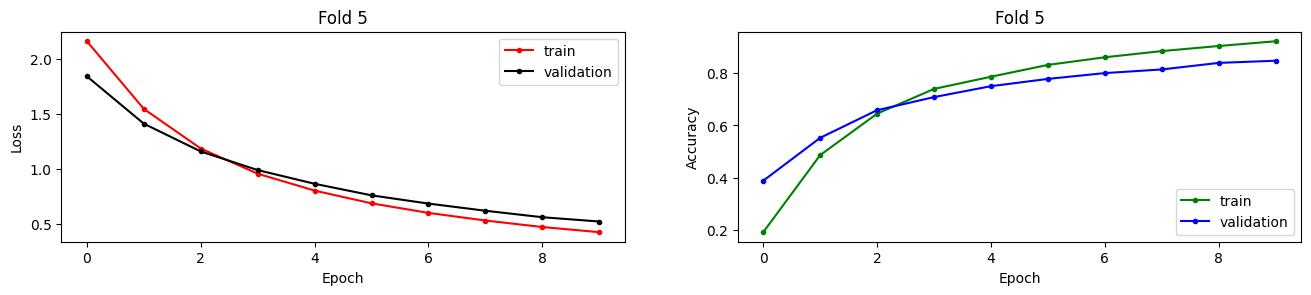

In [89]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories, save_path_template):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221)
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='red', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222)
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')

        save_path = save_path_template.format(i+1)
        plt.savefig(save_path)
        plt.show()

save_path_template = '(TEST 10) plot 221 fold {}.png'
summarize_diagnostics_single(histories, save_path_template)

Accuracy: mean=88.722 std=2.240, n=5


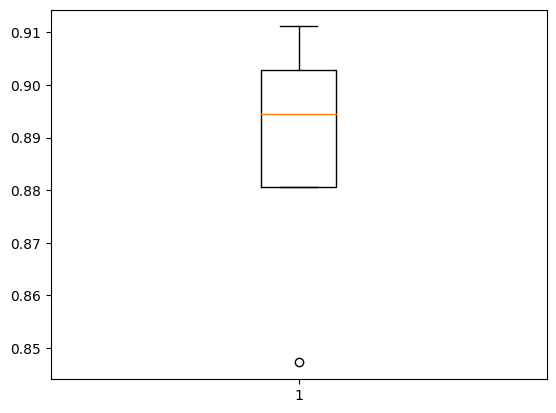

In [90]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.savefig(save_path)
    plt.show()

# summarize estimated performance
save_path = '(TEST 10) peformance.png'
summarize_performance(scores)

In [91]:
if "model" in globals():
  del model
  gc.collect()

# Load model
from keras.models import load_model
model = load_model('/content/save_model/model_fold_5.h5')

57/57 [==============================] - 3s 40ms/step


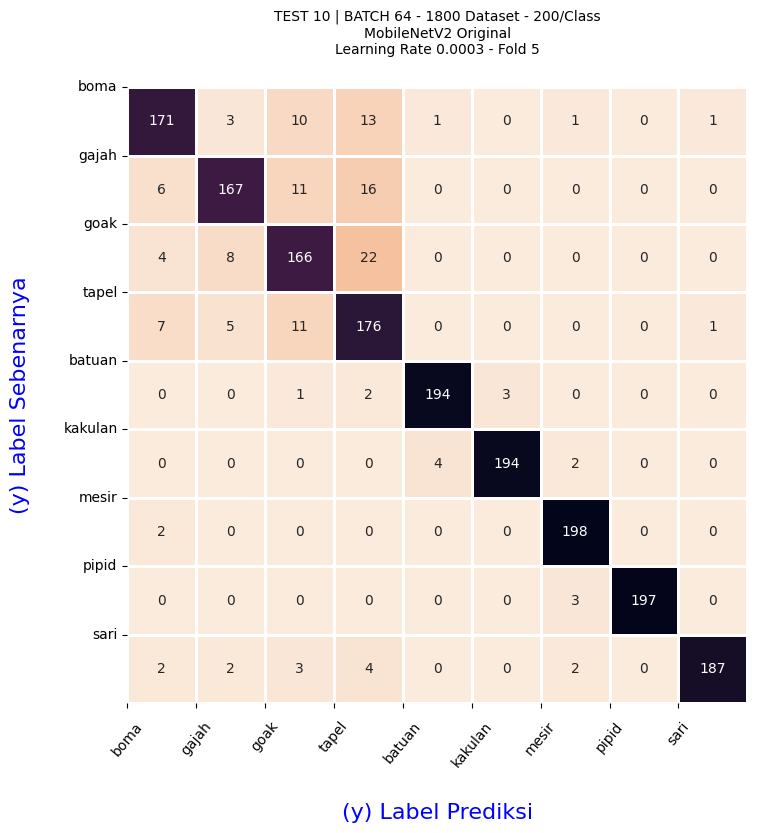

57/57 [==============================] - 2s 40ms/step


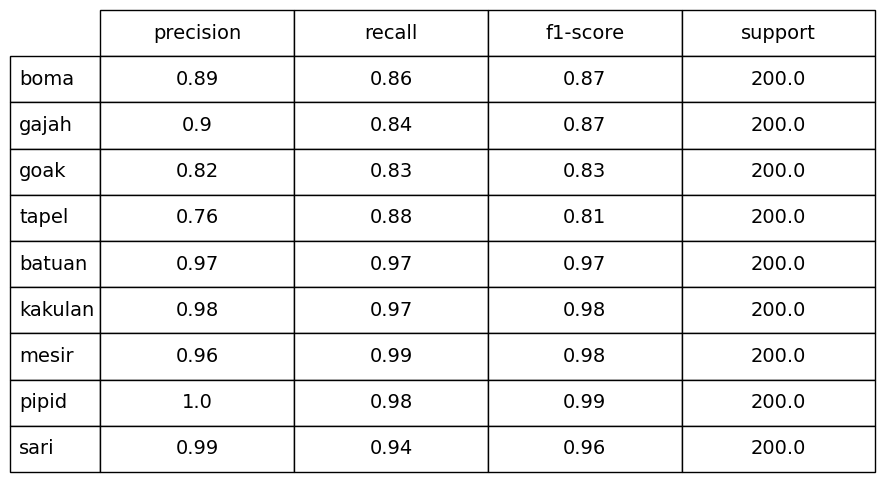

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def generate_confusion_matrix(model, dataX, dataY):
    y_pred = model.predict(dataX)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(dataY, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    return cm

def plot_confusion_matrix(cmatrix, target_names, save_path):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cmatrix, cmap="rocket_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False)
    plt.title('TEST 10 | BATCH 64 - 1800 Dataset - 200/Class\nMobileNetV2 Original\nLearning Rate 0.0003 - Fold 5', fontsize=10, pad=24)
    plt.xlabel("(y) Label Prediksi", fontsize=16, color="blue", labelpad=24)
    plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="blue", labelpad=24)
    plt.xticks(ticks=range(len(target_names)), labels=target_names, fontsize=10, rotation=50)
    plt.yticks(ticks=range(len(target_names)), labels=target_names, fontsize=10, rotation=0)
    plt.tick_params(axis='x', pad=8)
    plt.ylim(len(target_names), 0)
    plt.savefig(save_path)
    plt.show() ###

def print_classification_report(true_label, pred_label, target_names, save_path):
    creport = classification_report(true_label, pred_label, target_names=target_names, output_dict=True)
    df = pd.DataFrame(creport).transpose()
    df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
    df = df.round(decimals=2)
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    table = plt.table(cellText=df.values,
                      colLabels=df.columns,
                      rowLabels=df.index,
                      cellLoc='center',
                      loc='center',
                      bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1.4, 1.4)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.5)
    plt.show() ###

cmatrix = generate_confusion_matrix(model, X_train_norm, y_train_encode)
target_names = ['boma', 'gajah', 'goak', 'tapel', 'batuan', 'kakulan', 'mesir', 'pipid', 'sari']
plot_confusion_matrix(cmatrix, target_names, '(TEST 10) confusion_matrix.png')

y_pred = model.predict(X_train_norm)
y_pred = np.argmax(y_pred, axis=1)

classification_report_path = '(TEST 10) classification_report.png'
print_classification_report(np.argmax(y_train_encode, axis=1), y_pred, target_names, classification_report_path)

In [93]:
# save modelnya
model.save('(TEST 10) MODEL-24-04-2024.h5')